In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [7]:
# 파일 불러오기
data = pd.read_csv('data/ky_twiiter3.csv')
data.drop_duplicates() # 중복행 제거

,text
0,Replying to \n@hazal_thing
1,고양시 새로운 공공 자전거 타조\n퇴근 길 봄바람을 느껴 본다
2,공공자전거타보고싶어
3,Replying to \n@ttoyon913
4,광주시 공공자전거 이름 타랑께 라는거 보고 오열중ㅋㅋㅋㅋㅋㅋㅋㅋ
...,...
1959,"방탄소년단 RM, 외제차 아닌 따릉이 타는 월드스타? (출처 : OSEN | 네이버..."
1960,지문로그인-빠른결제-외국어 서비스… 확 바뀐 ‘따릉이’ 앱
1962,광주 따릉이 이름 타랑께 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
1963,[어플정보] 15일부터는 좀 더 편하게 '따릉이'를 이용할 수 있게 '따릉이 앱'을...


In [35]:
# title data 합치기 (제거: '\n')
message = ''
for item in data['text']:
    message = message + re.sub('[^\w]', ' ', item) +''

# 정규화 (제거할 단어)
message = re.sub('자전거', '', message)
message = re.sub('바이크', '', message)
message = re.sub('공유', '', message)
message = re.sub('공공', '', message)
# message = re.sub('누비자', '', message)
message = re.sub('따릉', '', message)
message = re.sub('이용', '', message)
message = re.sub('대여', '', message)
message = re.sub('타고', '', message)
message = re.sub('서울', '', message)
message = re.sub('서울시', '', message)
message = re.sub('오늘', '', message)
# message = re.sub('창원', '', message)
# message = re.sub('광주', '', message)
# message = re.sub('수원', '', message)

# message

In [36]:
# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)
# message_N

In [37]:
# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)

중국 : 183
서비스 : 101
운영 : 91
헬멧 : 91
도로 : 77
뉴스 : 70
출처 : 68
사람 : 67
의무 : 62
네이버 : 56
어디 : 56
이름 : 53
버스 : 50
정책 : 50
민간 : 49
한국 : 47
생각 : 47
무료 : 46
사업 : 46
하나요 : 46
한강 : 44
오포 : 44
도입 : 42
시간 : 40
업체 : 40
광주 : 39
안장 : 39
근처 : 38
시민 : 38
진짜 : 38
반납 : 38
정비 : 37
시작 : 37
결제 : 36
투자 : 36
안전모 : 35
보드 : 34
도시 : 34
무인 : 33
퇴근 : 32
타슈 : 32
최초 : 32
다음 : 32
사용 : 31
제안 : 29
스타트업 : 29
우리 : 28
운동 : 28
높이 : 28
전국 : 27
원래 : 27
시장 : 27
경제 : 27
갑자기 : 27
이제 : 26
전기 : 26
브레이크 : 26
시범 : 26
링크 : 26
보고 : 25
날씨 : 25
관련 : 25


# 히스토그램
___

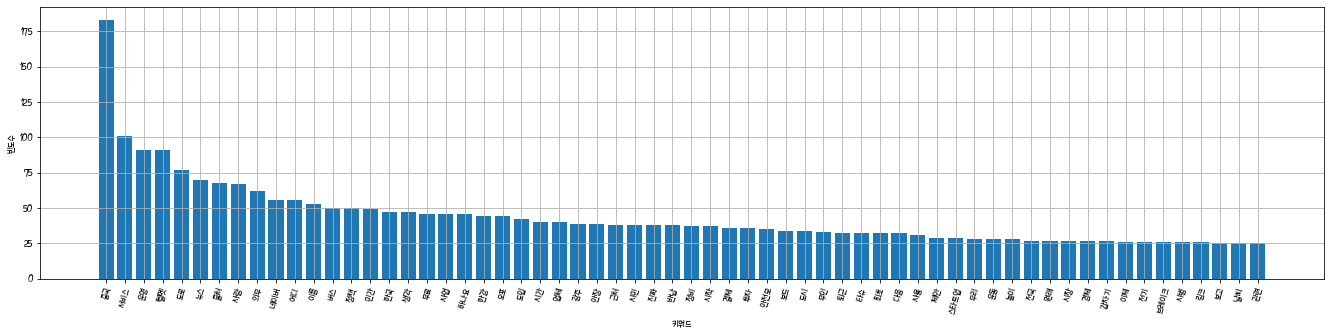

In [38]:
from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

# 워드클라우드 
___

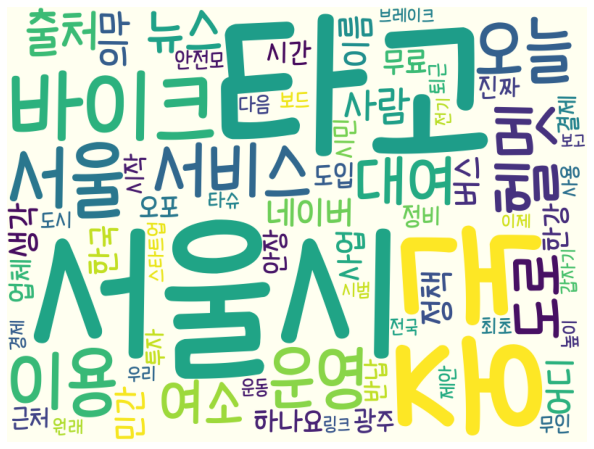

In [14]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
wc.to_file('data/wordcloud3_twitter.png')